# Fantasy Football Data: A data scientist's attempt at picking the perfect team

Welcome to this interactive Python notebook dedicated to the captivating realm of fantasy football data investigation! In this notebook, we will embark on a journey to explore the intricate relationship between various factors and our primary target variable: "total_points." If you have a passion for Football, data analysis, or both, you're in for a treat!

## Notebook Highlights

1. **Getting Acquainted with the Dataset**: Let's begin by loading and acquainting ourselves with the dataset that will be the cornerstone of our analysis. Our dataset comprises a rich collection of statistics from fantasy football players, encompassing essential details like player positions, team, minutes played, goals scored, assists, and more.

2. **Feature Selection and Crafting**: To uncover the factors that significantly influence a player's fantasy performance, we'll first identify key features that are likely to impact our target variable, "total_points." Additionally, we'll explore the possibility of creating new features to capture nuanced insights.

3. **Diving into Exploratory Data Analysis (EDA)**: Exploratory Data Analysis is pivotal in comprehending data distributions, relationships, and trends. Through visualizations and initial analyses, we will unearth valuable insights into correlations, distributions, and potential anomalies.

4. **Unveiling Statistical Insights**: Our exploration will transcend visualizations, as we employ statistical methods to quantify relationships between different variables. From correlation analysis to hypothesis testing, this section will lay a sturdy statistical foundation for our investigation.


Upon concluding this notebook, you will not only possess a deeper comprehension of the diverse factors influencing a football player's fantasy performance but also acquire practical skills encompassing data investigation, visualization, statistical analysis, all within the exciting context of football.

Whether your aim is to strategize for the best fantasy team or understand a little more about data science, let's get started by taking a look at some of the data we are going to be working with! ⚽📊📈


## 1. Getting Acquainted with the Dataset

Gaining access to fantasy football data can sometimes be challenging, Lucky for you I have compiled a library of functions that should get all of the data you could ever want and need about a player!

We will start the notebook by importing in the relevant librarys we need as seen bellow:

In [1]:
from fpl_data.player_data import *
import matplotlib.pyplot as plt 
import seaborn as sns
import math

Now that we have imported the library we can start to grab some of the data we need. The first thing I would do is take a look at the static data that gets updated each gameweek. 

To do this lets use the method **get_static_data()**

In [2]:
get_static_data()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,100.0,100.0,232223,0,0,0,0,0,4,0.0,...,414,67,522,51,523,51,210,39,0.00,0.00
1,NaN,NaN,58822,0,0,0,0,0,2,0.0,...,575,157,349,117,349,117,257,97,0.00,0.00
2,0.0,0.0,153256,0,0,-1,1,0,3,0.0,...,539,284,462,165,463,165,430,139,0.00,0.00
3,NaN,NaN,438098,0,0,-1,1,0,3,2.3,...,149,95,119,49,16,10,418,135,0.00,0.00
4,NaN,NaN,226597,0,0,-1,1,0,2,0.7,...,296,33,267,91,290,105,18,5,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,NaN,NaN,200402,0,0,0,0,0,2,2.3,...,388,82,107,33,139,46,247,91,1.00,0.33
680,NaN,NaN,510362,0,0,0,0,0,2,0.7,...,502,125,257,88,272,101,435,169,0.00,0.00
681,NaN,NaN,476502,0,0,0,0,0,3,0.0,...,470,247,551,204,552,204,230,73,0.00,0.00
682,100.0,100.0,430871,0,0,0,0,0,4,2.0,...,121,33,151,21,182,23,208,38,1.08,0.36


Now this is in a format that is not great to work with luckily I have built a function to clean that data and also map up some of the values so that they can be understood by humans. Also to keep consistency as this dataset will change weekly I am going to read the static data from a csv :) 

In [3]:
df = pd.read_csv('data/raw_static.csv')
df = clean_static_data(df)

Now that we have some of this seasons data it would be good to understand what relationship our points have had with each of the variables so far. Lets build out a few plots so that we can try to understand a little bit about our target variable total_points

In [4]:
print("Total points earned so far this season: " + str(df['total_points'].sum()))
print("Average points earned so far this season: " + str(df['total_points'].mean()))
print("Total number of players: " + str(df['id'].shape[0]))
print("Total number of teams: " + str(df['team_code'].drop_duplicates().shape[0]))
print("Average cost: " + str(df['now_cost'].mean()))
print("Min cost: " + str(df['now_cost'].min()))
print("Max cost: " + str(df['now_cost'].max()))

Total points earned so far this season: 2112
Average points earned so far this season: 3.087719298245614
Total number of players: 684
Total number of teams: 20
Average cost: 49.26900584795322
Min cost: 40
Max cost: 140


<AxesSubplot: >

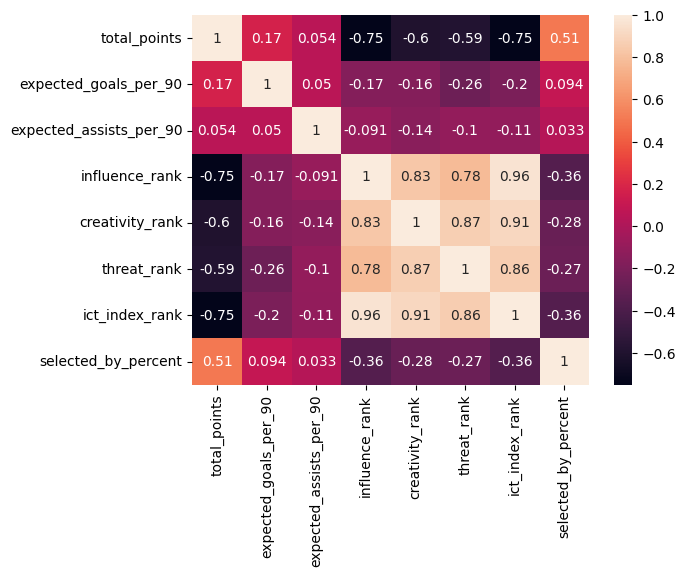

In [5]:
var_list = ['total_points','expected_goals_per_90','expected_assists_per_90','influence_rank',
                'creativity_rank','threat_rank','ict_index_rank','selected_by_percent']
sns.heatmap(df[var_list].corr(),annot=True)

## Feature details

As we delve into the correlation between each variable, a clear pattern emerges. Both "influence rank" and "selected_by_percentage" stand out as potentially pivotal components for our model to yield precise predictions.

Before we venture deeper, let's gain a comprehensive understanding of our current features. Below is an inventory of the variables, along with corresponding definitions:

1. **expected_goals_per_90**: Anticipated number of goals a player is expected to score per 90 minutes of play.
2. **expected_assists_per_90**: Estimated count of assists a player is projected to provide per 90 minutes of play.
3. **influence_rank**: This rank quantifies a player's impact on a match—an essential metric in calculating the ICT (Influence, Creativity, Threat) Index.
4. **creativity_rank**: Measuring a player's creativity during a game, this rank significantly contributes to the ICT Index calculation.
5. **threat_rank**: Reflecting the likelihood of a player scoring or assisting, this rank plays a crucial role in computing the ICT Index.
6. **ict_index_rank**: The ICT Index serves as a yardstick for assessing a fantasy football player's prowess. A higher rank often indicates better performance.
7. **selected_by_percent**: Represented as a value between 0 and 1, this metric indicates the proportion of fantasy team owners who have included the player in their team for the week.

As we move forward, harnessing the power of these insights will undoubtedly lead us to a more robust and accurate prediction model.

Now that we understand a little more about each of our current features it would be good to get some more plots to see how we can potentially identify a great player to be in our side

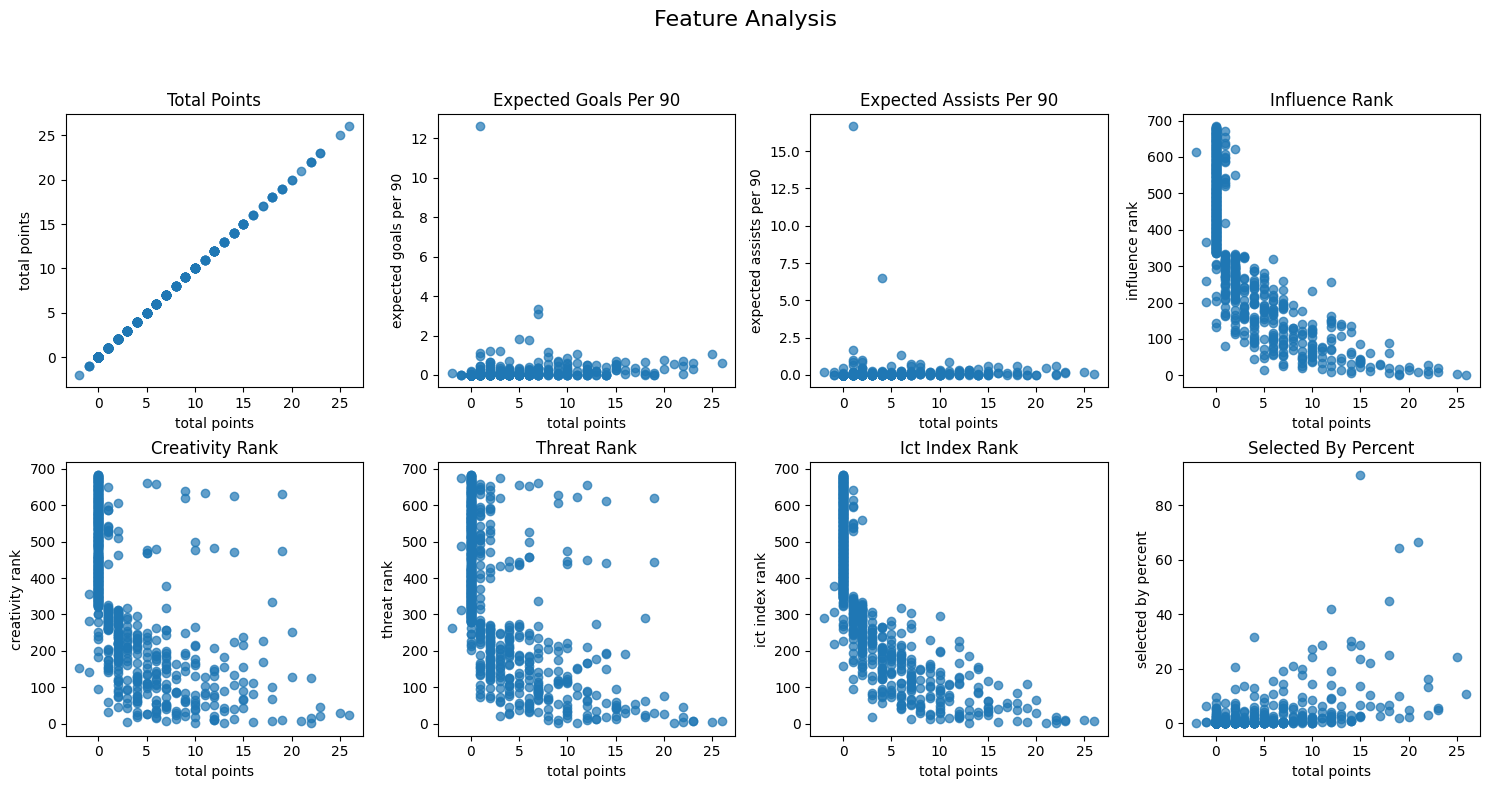

In [6]:
# Define the layout of subplots
num_rows = 2
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.suptitle("Feature Analysis", fontsize=16)

for i, variable in enumerate(var_list):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Create the subplot for the current variable
    ax.scatter(df['total_points'],df[variable], alpha=0.7)
    ax.set_title(variable.replace('_', ' ').title())
    ax.set_xlabel("total points")
    ax.set_ylabel(variable.replace('_', ' '))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

## Quick Insight 1 

These plots show the relationships between variables a lot clearer, shedding light on the intricate connections involving the `total_points` variable:
 - As selected by percentage increases the total_points tends to increase 
 - As the influence rank decreases the total_points increases

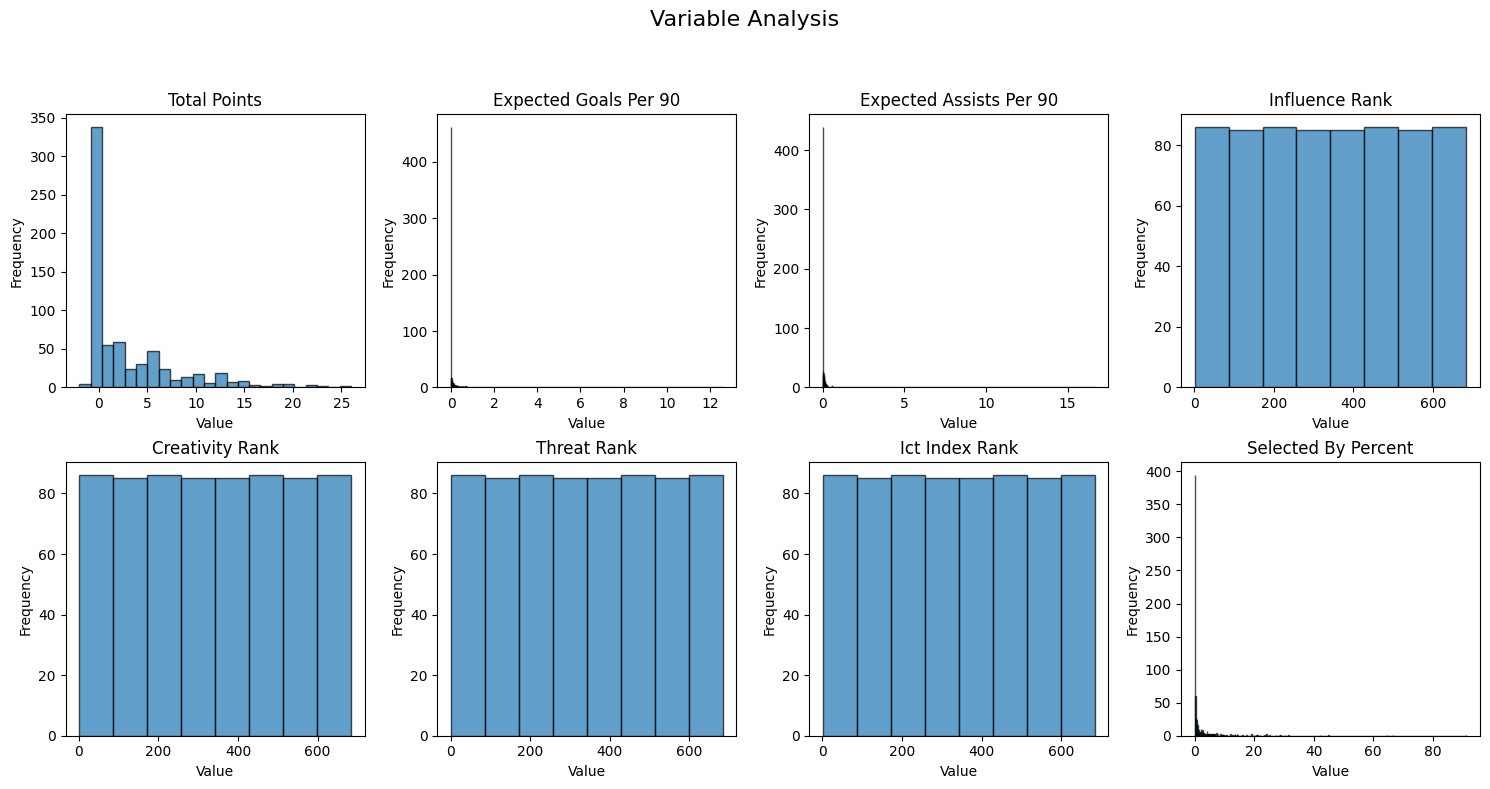

In [7]:
# Define the layout of subplots
num_rows = 2
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.suptitle("Variable Analysis", fontsize=16)

for i, variable in enumerate(var_list):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Calculate bin size using Freedman-Diaconis rule
    iqr = np.percentile(df[variable], 75) - np.percentile(df[variable], 25)
    bin_width = 2 * iqr * math.pow(len(df[variable]), -1/3)
    num_bins = int((max(df[variable]) - min(df[variable])) / bin_width)

    # Create the subplot for the current variable
    ax.hist(df[variable], bins=num_bins, edgecolor='black', alpha=0.7)
    ax.set_title(variable.replace('_', ' ').title())
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

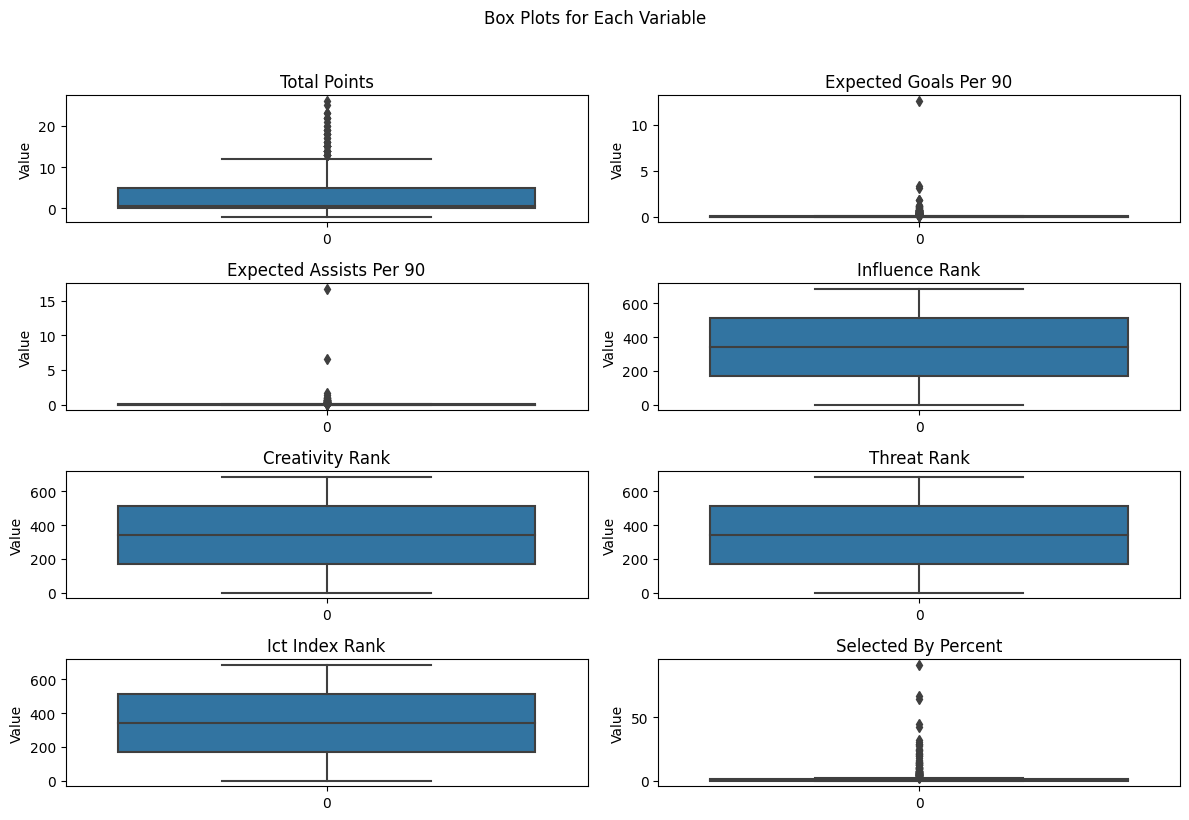

In [8]:
# Calculate the number of rows and columns for subplots
num_rows = (len(var_list) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle("Box Plots for Each Variable", y=1.02)

# Flatten the axes array
axes = axes.flatten()

# Create box plots for each variable in subplots
for i, variable in enumerate(var_list):
    sns.boxplot(data=df[variable], ax=axes[i])
    axes[i].set_title(variable.replace('_', ' ').title())
    axes[i].set_ylabel("Value")

# Hide any extra subplots
for j in range(len(var_list), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Quick insight 2 

While observing the distribution of individual variables is insightful, it becomes evident that the data's wild fluctuations obscure straightforward analysis. 

In such intricate cases:

- The data's unpredictable nature leads to a complex choreography, defying easy categorization.


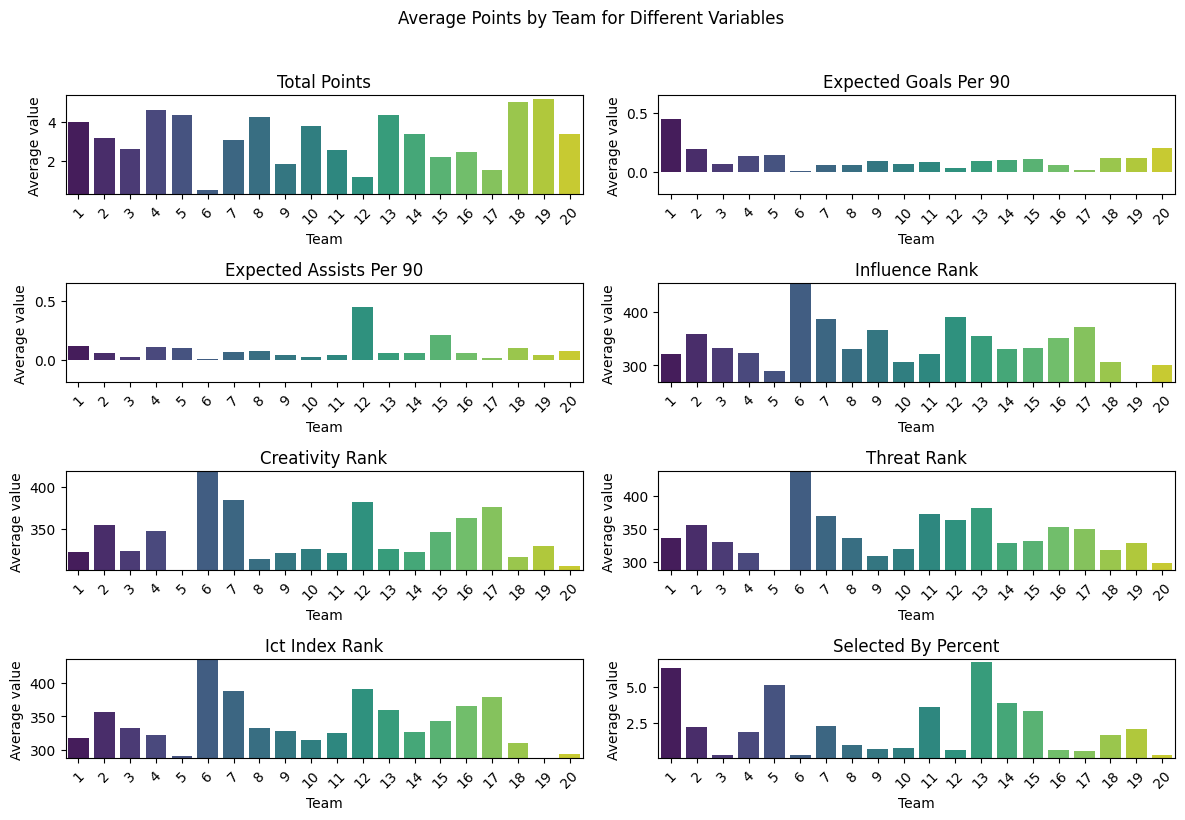

In [9]:
# Calculate average points for each variable by team
team_avg_points = df.groupby("team")[var_list].mean().reset_index()

# Define the layout of subplots
num_rows = (len(var_list) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8),sharey=False)
fig.suptitle("Average Points by Team for Different Variables", y=1.02)

# Flatten the axes array
axes = axes.flatten()

# Create bar plots for each variable in subplots
for i, variable in enumerate(var_list):
    sns.barplot(data=team_avg_points, x="team", y=variable, palette="viridis", ax=axes[i])
    axes[i].set_title(variable.replace('_', ' ').title())
    axes[i].set_xlabel("Team")
    axes[i].set_ylabel("Average value")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, df[variable].max() * 1.2)

    # Adjust y-axis limits as needed
    max_value = team_avg_points[variable].max()
    min_value = team_avg_points[variable].min()
    axes[i].set_ylim(min_value - 0.2, max_value + 0.2)

# Hide any extra subplots
for j in range(len(var_list), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Team Insights

Taking a closer look, Team 19 stands out in an intriguing way. While having relatively low average scores in influence, creativity, and threat, their total points are remarkably high.

This observation prompts a fascinating consideration of the interplay between these variables. Team 19's unique blend of attributes suggests a distinct strategy that leads to good overall performance.

This example underscores the diversity of pathways to success within the dataset, reminding us that effective analysis goes beyond conventional patterns and embraces the unexpected correlations that shape outcomes.

Now most people would think that this team may be Man City or Arsenal given current form but surprisingly it is West Ham at the time of writing this!

In [10]:
print("The team with the highest average point is: "+df[df.team == 19]['team_name'].iloc[0])

The team with the highest average point is: West Ham


## 2. Feature Selection and Crafting

Now that we've gotten acquainted with the data and gained insights into each variable, it's clear that we've got some useful info, but there's potential for more. Expanding our view could give us a better shot at predicting the top-performing team.

So, let's shift our focus to historical data, player stats, and fixture rankings. These sources promise some interesting insights that could really spice up our journey ahead. 

With these extra layers of information, we're set to uncover more trends to boost our predictive model's capabilities.

Our first step is to use the function **get_curated_player_data** this will retreive all the data we need

**NOTE** The function can take some time to run (Around 8 mins on average in my tets) so go make yourself a cup of tea/coffee/whiskey whilsts its doing its thing. ALternativly you can work with the csv version I have in the data folder named curated.csv

In [13]:
# Reads in the data from API
# df = get_curated_player_data()
# Reads in the data from CSV
df = pd.read_csv('data/curated.csv')